<a href="https://colab.research.google.com/github/larin92/ML_zoomcamp/blob/main/02-regression/02-homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from numpy import ndarray

%matplotlib inline

### Task

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

The goal of this homework is to create a regression model for predicting housing prices (`median_house_value`).

In [2]:
# !command style for colab use
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
# df = pd.read_csv('housing.csv')

df_raw = pd.read_csv('../01-intro/housing.csv')
TARGET_COLUMN = 'median_house_value'

In [3]:
print(df_raw.head())
print("\nshape: ", df_raw.shape)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

shape:  (20640, 10)


### EDA

- Look at the `median_house_value` variable. Does it have a long tail?

c:\Users\larki\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\larki\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

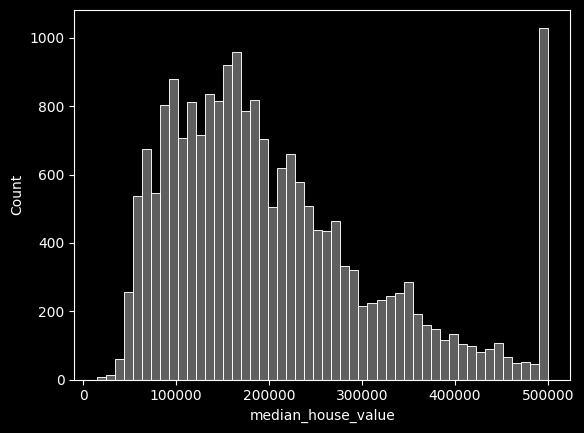

In [4]:
plt.style.use("dark_background")
sns.histplot(df_raw[TARGET_COLUMN], bins=50, color='grey')

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Filtering the dataset

For this homework, we only want to use a subset of data.

- First, keep only the records where `ocean_proximity` is either `<1H OCEAN` or `INLAND`
- Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [6]:
df_filtered = df_raw[df_raw['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
print(df_filtered.ocean_proximity.value_counts(), '\n')

del df_filtered['ocean_proximity']
df_filtered.reset_index(drop=True, inplace=True)
print(df_filtered.info())

ocean_proximity
<1H OCEAN    9136
INLAND       6551
Name: count, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15687 entries, 0 to 15686
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB
None


### Question 1

- There's one feature with missing values. What is it?

In [7]:
df_filtered.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

- What's the median (50% percentile) for variable `population`?

In [8]:
df_filtered['population'].median()

1195.0

### Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [9]:
def shuffle_split_log_dataset(df: DataFrame, seed: int) -> (DataFrame, DataFrame, DataFrame):
    random_generator = np.random.default_rng(seed=seed)
    
    df_log = df.copy()
    df_log[TARGET_COLUMN] = np.log1p(df[TARGET_COLUMN].values)
    # print(df_log[TARGET_COLUMN].head())

    sample = lambda frac: df_log.sample(frac=frac, 
                                        random_state=random_generator, 
                                        ignore_index=True)
    df_train, df_val, df_test = sample(0.6), sample(0.2), sample(0.2)
    
    # print(df.shape[0], df_log.shape[0], df_train.shape[0] + df_val.shape[0] + df_test.shape[0])

    return df_train, df_val, df_test

In [10]:
def prepare_x_y(df:DataFrame) -> (ndarray, ndarray):
    df_copy = df.copy()
    y = df_copy.pop(TARGET_COLUMN)
    x = df_copy.values

    return x, y

In [11]:
def train_linreg(x: ndarray, y:ndarray, r=0):
    # adding ones as last column serving as "scaling coef" for bias
    x = np.column_stack([x, np.ones(x.shape[0])])

    # `r` is regularization param
    xtx = x.T @ x + (r * np.eye(x.T.shape[0]))
    w = np.linalg.inv(xtx) @ x.T @ y

    return w[:-1], w[-1]  # (weights, bias)

> Note:
> - `r` is regularization param, adds "noise" to main diagonal to prevent multicollinearity, which "breaks" finding inverse matrix.
> - sklearn.Ridge() regularizes like this: ||y - Xw||^2_2 + alpha * ||w||^2_2

In [12]:
def rmse(y_true, y_pred):
    se = (y_true - y_pred) ** 2
    mse = se.mean()
    
    return np.sqrt(mse)

In [13]:
def evaluate(df_train: DataFrame, df_test: DataFrame, r=0):
    w, b = train_linreg(*prepare_x_y(df_train), r)
    x_test, y_true = prepare_x_y(df_test)
    y_pred = x_test @ w + b
    
    return rmse(y_true, y_pred)

### Question 3

We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.

- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using `round(score, 2)`

Which option gives better RMSE?

In [14]:
def fill(df: DataFrame, fill_val=0):
    df_copy = df.copy()
    df_copy['total_bedrooms'].fillna(fill_val, inplace=True)
    return df_copy

df_train, df_val, df_test = shuffle_split_log_dataset(df_filtered, seed=42)
mean = df_train['total_bedrooms'].mean()

score_zero = evaluate(fill(df_train), fill(df_val))
score_mean = evaluate(fill(df_train, mean), fill(df_val, mean))

print("score filled with zero: ", round(score_zero, 2))
print("score filled with mean: ", round(score_mean, 2))

score filled with zero:  0.33
score filled with mean:  0.33


### Question 4

Now let's train a regularized linear regression.

- For this question, fill the NAs with 0.
- Try different values of `r` from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.

Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [15]:
df_train_0, df_val_0 = fill(df_train), fill(df_val)
rs = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
scores = [evaluate(df_train_0, df_val_0, r=r) for r in rs]
np.round(scores, 2)

array([0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.34, 0.34, 0.34])

### Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores?

- To compute the standard deviation, use `np.std`.
- Round the result to 3 decimal digits using `round(std, 3)`

What's the value of `std`?

> Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [16]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for seed in seeds:
    df_train, df_val, df_test = shuffle_split_log_dataset(df_filtered, seed=seed)
    scores += [evaluate(fill(df_train), fill(df_val))]
round(np.std(scores), 3)

0.004

### Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

In [17]:
df_train, df_val, df_test = shuffle_split_log_dataset(df_filtered, seed=9)
df_full_train = pd.concat([df_train, df_val])
evaluate(fill(df_train), fill(df_test), r=0.001)

0.35171461364547474